# Functions

Often we want to execute a sequence of statements multiple times with other input parameters. A `function` allows us to avoid unnecessary copying and enables a way of code reuse.

## Function definition

A `function` consists of a header and a body:

- The header is formed of the keyword `function` followed by the *output* variable, a `=` symbol, its name and in parentheses the *input* variable (called an *argument*).

- The body contains the statements to be executed and its end is marked with the keyword `end`.

In [1]:
function out = two_times(in)
    out = 2 * in;
end

In [2]:
two_times(2)

ans =  4


Multiple *input* and *output* variables can be specified, eg.:

In [3]:
function [prev_out, next_out] = fibonnaci(prev_in, next_in)
    prev_out = next_in;
    next_out = prev_in + next_in;
end

In [4]:
prev = 0;
next = 1;
[prev, next] = fibonnaci(prev, next)
[prev, next] = fibonnaci(prev, next)
[prev, next] = fibonnaci(prev, next)

prev =  1
next =  1
prev =  1
next =  2
prev =  2
next =  3


In [5]:
prev = 0;
next = 1;
for i = 1:10
    [prev, next] = fibonnaci(prev, next);
    disp(next)
end

 1
 2
 3
 5
 8
 13
 21
 34
 55
 89


## Workspace

Until now all variables we have declared, live in the same workspace, called the *global workspace*. Variables that are defined inside a function body live in the workspace associated with the function:

- Variables declared outside the function body can not be accessed from within the function.

- Variable declared inside the function body are not accessible outside the function.

In [6]:
function without_arguments()
    disp(a)
    a = 2;
    b = 3;
    disp(a)
end
a = 1;
disp(a)
without_arguments()
disp(a)
disp(b)

 1
error: 'a' undefined near line 2 column 10
error: called from
    without_arguments at line 2 column 5
 1
error: 'b' undefined near line 1 column 6


## `return`

A `function` normally executes till it reaches the `end` keyword. A premature ending can be forced by the `return` keyword:

In [7]:
function premature_ending()
    for i = 1:10
        disp(i)
        if i == 5
            return
        end
    end
end

premature_ending()

 1
 2
 3
 4
 5


## Help

A text that is returned when executing the command `help function_name`, can be provided: 

In [10]:
function out = two_times_with_help(in)
    % two_times_with_help: Function that returns two times the argument with help text.
    % The help text is entered at the beginning of the function body as comment lines.
    % Often the arguments and the output variables are specified:
    % in: numerical input
    % out: numerical output
    % Also the implemented algorithm can be detailed:
    % out = 2 * in
    
    out = 2 * in;
end

In [11]:
help two_times_with_help

'two_times_with_help' is a command-line function

 two_times_with_help: Function that returns two times the argument with help text.
 The help text is entered at the beginning of the function body as comment lines.
 Often the arguments and the output variables are specified:
 in: numerical input
 out: numerical output
 Also the implemented algorithm can be detailed:
 out = 2 * in


Additional help for built-in functions and operators is
available in the online version of the manual.  Use the command
'doc <topic>' to search the manual index.

Help and information about Octave is also available on the WWW
at http://www.octave.org and via the help@octave.org
mailing list.


## Anonymous functions

An anonymous function is a quick way to transform a single expression into a function:

sqr =

@(x) x .^ 2



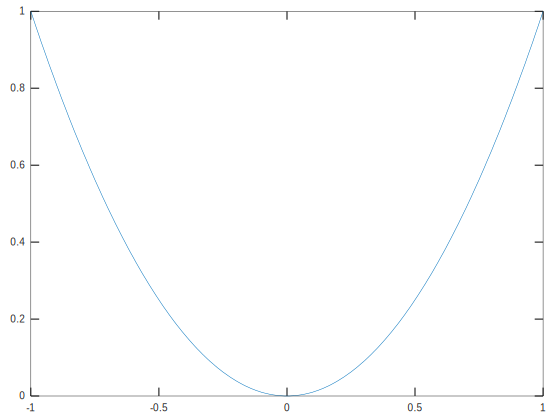

In [19]:
%plot --format svg
sqr = @(x)x.^2
x = -1:0.01:1;
plot(x,sqr(x))

## Function handles

You can create a handle to any MATLAB function and then use that handle as a means of referencing the function. A function handle is typically passed in an argument list to other functions, which can then *evaluate* the function using the handle.

A function handle is constructed using the *at* symbol, `@`, before the function name:

fsin = @sin


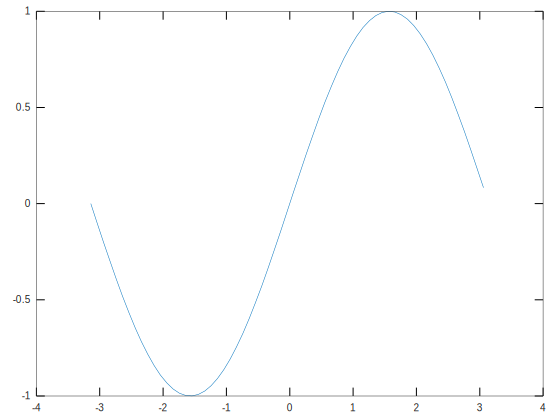

In [23]:
function plot_function(f, x)
    plot(x, f(x))
end

fsin = @sin
x = [-pi:0.1:pi];
plot_function(fsin, x)


## M files

MATLAB does not allow to define a function on the command line (as we have done ...). A function is defined in a separate file, called *M-file* that has the same name as the function having the `.m` extension. The first executable statement has to be `function ...`.

In [25]:
m_file_function(2)
help m_file_function

ans =  4
'm_file_function' is a function from the file /home/jupyter/ES112/Lectures/m_file_function.m

 m_file_function: Example function stored in a M-file.
 in: numerical argument
 out: numerical argument
 out = 2 * in


Additional help for built-in functions and operators is
available in the online version of the manual.  Use the command
'doc <topic>' to search the manual index.

Help and information about Octave is also available on the WWW
at http://www.octave.org and via the help@octave.org
mailing list.


# Scripts

Scripts are also *M-files* but they don't contain a function, i.e. the first executable statement is not `function ...`. The statements specified in the script are executed when the script name is entered.

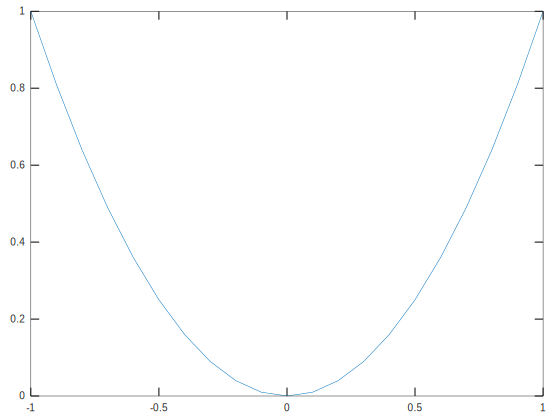

In [27]:
m_file_script

Difference between functions and scripts:

- Scripts do not accept input arguments or output variables.

- They execute in the global workspace.

 2
 3


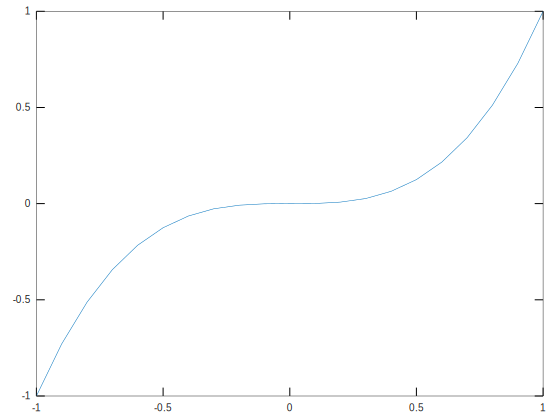

In [89]:
x = -1:0.1:1;
y = 2;
disp(y)
scripts_execute_in_the_global_workspace
disp(y)

# Examples

## Numerical integration

An integral $\int_a^bf(x)\mathrm dx$ can be calculated by estimating the area under the curve as a series of rectangles:
$$\int_a^bf(x)\mathrm dx\approx h \left(\frac{f(a)}{2}+f(a+h)+f(a+2h)+\cdots+f(a+(n-1)h)+\frac{f(b)}{2}\right)$$

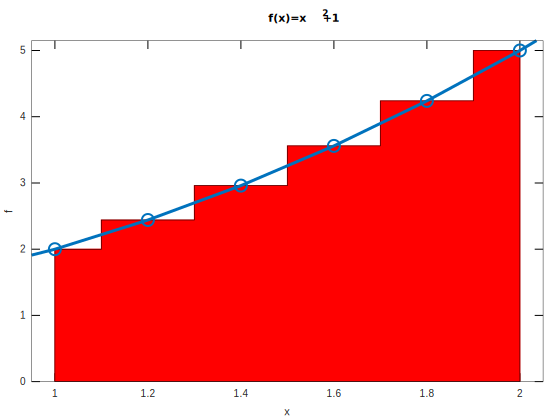

In [60]:
xi = 1.2:0.2:1.8;
xs = [1, 1, 1.1, reshape([xi-0.1;xi+0.1], 1, 8), 1.9, 2, 2];
ys = [0, 2, 2, reshape([xi.^2+1; xi.^2+1], 1, 8), 5, 5, 0];
fill(xs, ys, 'r')
axis([0.95,2.05,0,5.15])
hold on
x = 0.8:0.2:2.2;
plot(x,x.^2+1, '-o', 'linewidth', 3)
xlabel('x')
ylabel('f')
title('f(x)=x^2+1')

In [68]:
function s = my_integral(fh, a, b, n)
    h = (b-a)/n;
    s = fh(a)/2;
    for i = 1:n-1
        s = s + fh(a+i*h);
    end
    s = s + fh(b)/2;
    s = s*h;
end
f=@(x)x.^2+1;
my_integral(f, 1, 2, 5)
F=@(x)x.^3/3+x;
F(2)-F(1)

ans =  3.3400
ans =  3.3333


## Newton's method

To find a zero of a function $f(x)$ guess a starting answer and then iterate using the formula:
$$x_{n+1}=x_n-\frac{f(x_n)}{f^\prime(x_n)}$$
where $x_0$, $x_1$, $\dots$, $x_n$ are successive approximations to the root of $f$.

In [90]:
function x = my_newton(f, df, x0)
    x = x0;
    while abs(f(x))>0.01
        x = x - f(x) / df(x);
    end
end

pkg load symbolic
syms x
f = x^2-2;
df = diff(f, x);
fh = matlabFunction(f);
dfh = matlabFunction(df);
my_newton(fh, dfh, 1)
solve(f)

ans =  1.4167
ans = (sym 2×1 matrix)

  ⎡-√2⎤
  ⎢   ⎥
  ⎣√2 ⎦

